# Relazione 1

## Esercizio 1

Lo scopo di questo esercizio è valutare il generatore di numeri (psuedo)casuali fornito, utilizzando una serie di metodi per testare l'ipotesi che i valori generati siano effettivamente casuali.

Per avere una stima dell'incertezza statistica sui risultati dei test e degli esperimenti si è utilizzato il metodo della **media a blocchi** : avendo simulato $M$ risulati (o in generale "step" di un metodo MonteCarlo), si possono suddividere i risultati in $N<M$ blocchi, con $B=M/N$ valori per blocco e media dei valori del blocco (i-esimo) $A_i=\frac{1}{B}\sum_{j=N(i-1)+1}^{Ni}x_j$ ,  $i=1,\dots,N$. In questo modo, si può ottenere una stima del risultato banalmente calcolando la media dei blocchi, mentre per stimare l'incertezza si calcolano 
$$ \langle A^2 \rangle \simeq \frac{1}{N}\sum_{i=1}^N A_i^2 \qquad \qquad \langle A\rangle^2 \simeq \left( \frac{1}{N} \sum_{i=1}^N A_i \right)^2 $$
da cui possiamo ottenere la deviazione standard
$$ \sigma \simeq \sqrt{\langle A^2 \rangle - \langle A \rangle^2}$$
e finalmente l'incertezza statistica sulla media:
$$ \frac{\sigma}{\sqrt{N-1}} \simeq \sqrt{\frac{1}{N-1}\langle A^2 \rangle - \langle A \rangle^2}$$



### 1.1: Media dei valori simulati

Utilizzando un generatore che restituisce valori tra 0 e 1 campionando una distribuzione di probabilità uniforme, ci si aspetta che il valor medio della sequenza sia $\int_0^1r\ dr = \frac{1}{2}$. Sono stati generati $10^4$ valori compresi in $[0,1)$ divisi in $100$ blocchi.

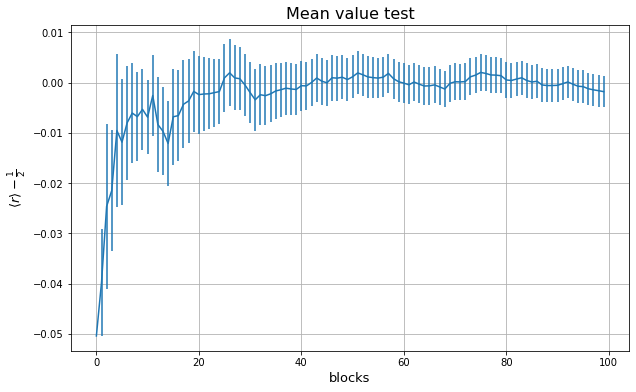

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

f, error = np.loadtxt("data/1means.dat", usecols=(0,1), delimiter=' ', unpack='true')
x = np.arange(f.size)
plt.figure(figsize=(10,6))
plt.errorbar(x,f-0.5,yerr=error)
plt.xlabel('blocks',fontsize=13)
plt.ylabel(r'$\langle r\rangle-\frac{1}{2}$',fontsize=13)
plt.grid(True)
plt.title('Mean value test',fontsize=16)

plt.show()


Il risultato di questo test è positivo: il valor medio dei numeri generati è compatibile con il valore atteso.

### 1.2: Varianza


Anche in questo caso sono stati generati $10^4$ valori e le varianze calcolate sono state divise in $100$ blocchi.
Il risultato ottenuto è simile al test precedente: il valore numerico è compatibile con il valore aspettato di $\sigma^2=\int_0^1(r-\frac{1}{2})^2\ dr = \frac{1}{12}$.

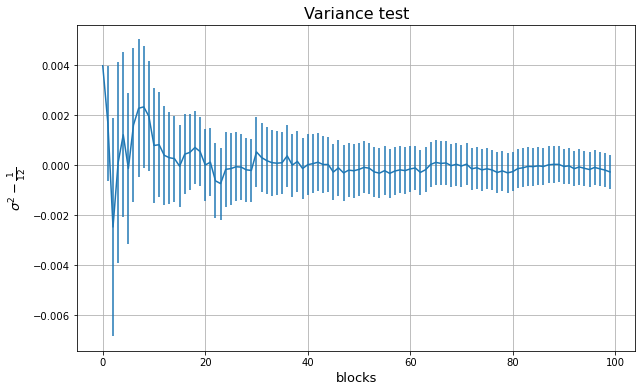

In [2]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

expected = float(1)/float(12)
plt.figure(figsize=(10,6))
f, error = np.loadtxt("data/1vars.dat", usecols=(0,1), delimiter=' ', unpack='true')
x = np.arange(f.size)
plt.errorbar(x,f-expected,yerr=error)
plt.xlabel('blocks',fontsize=13)
plt.ylabel(r'$\sigma^2-\frac{1}{12}$',fontsize=13)
plt.grid(True)
plt.title('Variance test',fontsize=16)

plt.show()

### 1.3: Test $\chi^2$

Eseguendo un test del $\chi^2$ si osservano però i limiti dell'algoritmo utilizzato. 

Generiamo $n=10^4$ valori con il nostro generatore: dividendo l'intervallo $[0,1]$ in $M=100$ sottointervalli, ci si aspetta che il numero di valori estratti in ciascun sottointervallo sia semplicemente $n/M$, e che il valore di $\chi^2$ sia quindi circa uguale al numero di sottointervalli definiti. Seppure $M=100$ corrisponda al picco della distribuzione dei valori di $\chi^2$ ottenuti in 100 di queste prove, rappresentata nell'istogramma successivo, si osserva che i valori si distribuiscono in un intervallo relativamente ampio ($\sim[80,120]$). Questo confuta l'ipotesi (effettivamente errata) che i numeri generati provengano da una distribuzione di probabilità casuale ed uniforme.

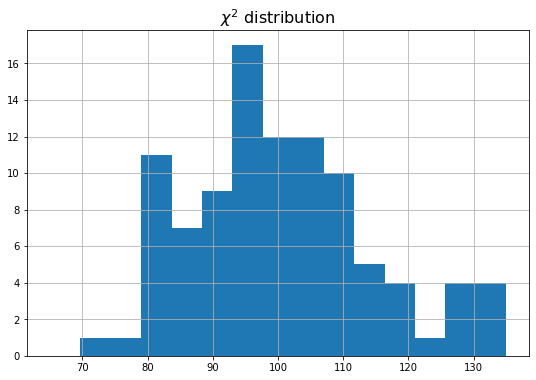

In [3]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

chi = np.loadtxt('data/1Chi.dat')
nbins = 15

plt.figure(figsize=(9,6))
n, bins, patches = plt.hist(chi, nbins, range=(65,135) )
plt.title(r'$\chi^2$ distribution',fontsize=16)
plt.grid(True)

plt.show()

## Esercizio 2

In questo test si osservano gli effetti del Teorema del Limite Centrale per alcune distribuzioni di probabilità:
- distribuzione uniforme (discreta) tra 1 e 6: si ottiene facilmente moltiplicando per 6 un numero $r$ estratto da una sequenza di numeri (pseudo)casuali uniformemente distribuiti tra 0 e 1 e sommandone la parte intera con 1.
- distribuzione esponenziale $p(x) = \lambda \exp(-\lambda x)$ (campionata con $\lambda = 1$) : una distribuzione di questo tipo si può ottenere per inversione della cumulativa. Una sequenza di valori data da $F(r) = -\frac{1}{\lambda}\ln(1-r)$, con $r$ numero casuale estratto da una distribuzione uniforme tra 0 e 1, soddisfa il requisito richiesto.
- distribuzione Lorentziana $p(x) = \frac{1}{\pi}\frac{\Gamma^2}{\Gamma^2+x^2} $ (campionata con $\Gamma=1$): anche una distribuzione di questo tipo può essere ottenuta per inversione della cumulativa. La sequenza richiesta è data da $F(r) = \Gamma\tan(\pi(r-\frac{1}{2}))$, con $r$ uniformemente distribuito tra 0 e 1.

In figura sono rappresentati gli istogrammi della distribuzione di $S_N = \frac{1}{N}\sum_{i=1}^N x_i$ (al variare di $N$), dove $x_i$ denota il risultato ottenuto dal lancio di un "dado" i cui risultati si distribuiscono secondo una delle funzioni sopra illustrate. In tutti i casi gli istogrammi contengono $10^4$ stime di $S_N$.

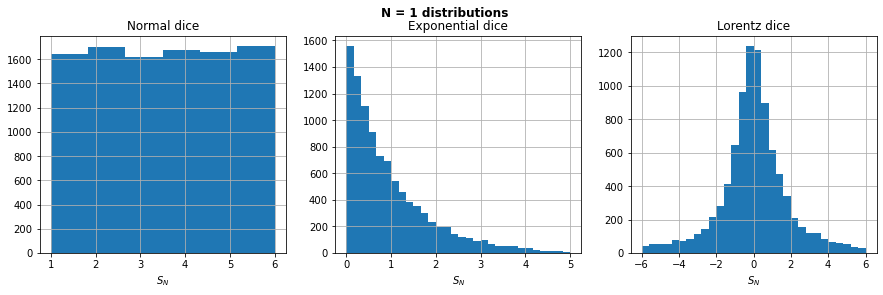

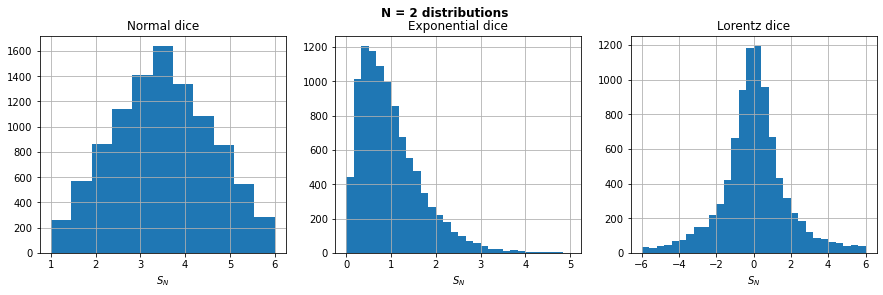

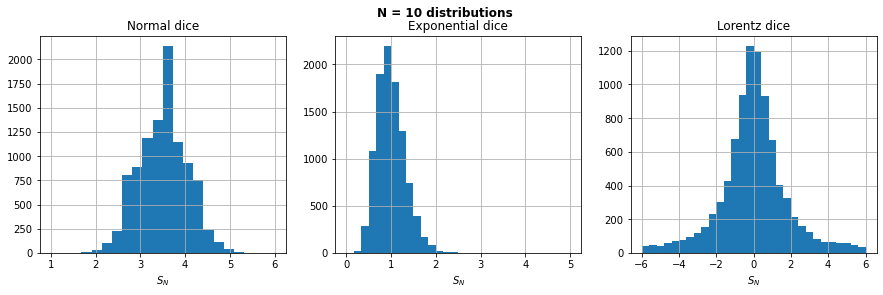

In [4]:

import matplotlib.pyplot as plt
import numpy as np

stdbins = 30


# ------ N=1 ------ #
norm1 = np.loadtxt('data/2norm.dat', usecols=(0), delimiter = ' ')
expo1 = np.loadtxt('data/2exp.dat', usecols=(0), delimiter = ' ')
lore1 = np.loadtxt('data/2lor.dat', usecols=(0), delimiter = ' ')

plt.figure(figsize=(15,4))
plt.suptitle('N = 1 distributions',fontweight="bold")

plt.subplot(131)
plt.hist(norm1,6,range=(1,6))
plt.title('Normal dice')
plt.xlabel('$S_N$')
plt.grid(True)

plt.subplot(132)
plt.hist(expo1,stdbins,range=(0,5))
plt.title('Exponential dice')
plt.xlabel('$S_N$')
plt.grid(True)

plt.subplot(133)
plt.hist(lore1,stdbins,range=(-6,6))
plt.title('Lorentz dice')
plt.xlabel('$S_N$')
plt.grid(True)

# ------ N=2 ------ #
norm2 = np.loadtxt('data/2norm.dat', usecols=(1), delimiter = ' ')
expo2 = np.loadtxt('data/2exp.dat', usecols=(1), delimiter = ' ')
lore2 = np.loadtxt('data/2lor.dat', usecols=(1), delimiter = ' ')

plt.figure(figsize=(15,4))
plt.suptitle('N = 2 distributions',fontweight="bold")

plt.subplot(131)
plt.hist(norm2,11,range=(1,6))
plt.title('Normal dice')
plt.xlabel('$S_N$')
plt.grid(True)

plt.subplot(132)
plt.hist(expo2,stdbins,range=(0,5))
plt.title('Exponential dice')
plt.xlabel('$S_N$')
plt.grid(True)

plt.subplot(133)
plt.hist(lore2,stdbins,range=(-6,6))
plt.title('Lorentz dice')
plt.xlabel('$S_N$')
plt.grid(True)

# ------ N=10 ------ #
norm10 = np.loadtxt('data/2norm.dat', usecols=(2), delimiter = ' ')
expo10 = np.loadtxt('data/2exp.dat', usecols=(2), delimiter = ' ')
lore10 = np.loadtxt('data/2lor.dat', usecols=(2), delimiter = ' ')

plt.figure(figsize=(15,4))
plt.suptitle('N = 10 distributions',fontweight="bold")

plt.subplot(131)
plt.hist(norm10,22,range=(1,6))
plt.title('Normal dice')
plt.xlabel('$S_N$')
plt.grid(True)

plt.subplot(132)
plt.hist(expo10,stdbins,range=(0,5))
plt.title('Exponential dice')
plt.xlabel('$S_N$')
plt.grid(True)

plt.subplot(133)
plt.hist(lore10,stdbins,range=(-6,6))
plt.title('Lorentz dice')
plt.xlabel('$S_N$')
plt.grid(True)

plt.show()


All'aumentare di $N$ si nota come tutte le distribuzioni assumano un aspetto sempre più piccato e simmetrico. Per $N=100$ il risultato è ancora più evidente, e si può eseguire un fit dei dati:

/tmp/ipykernel_65448/92803024.py:8: RuntimeWarning: overflow encountered in exp
  return a*np.exp(-b*((x-c)**2))


--- NORMAL (UNIFORM) DICE ---
gaussian fit parameters:  [1196.65766009   16.65526558    3.49898886]
--- EXPONENTIAL DICE ---
gaussian fit parameters:  [1.37449083e+03 4.99240650e+01 9.93932272e-01]
--- LORENTZ DICE ---
distribution fit parameters:  [1.33350938e+03 9.96199009e-01 1.97436942e-02]


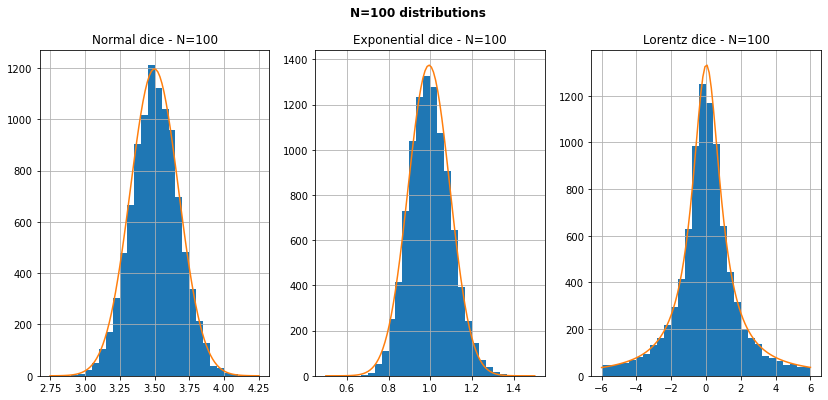

In [5]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

#fitting functions
def gaus(x,a,b,c):
    return a*np.exp(-b*((x-c)**2))

def lore(x,I,gamma,mu):
    return I*gamma*gamma/((x-mu)**2+gamma**2)

plt.figure(figsize=(14,6))
plt.suptitle('N=100 distributions',fontweight='bold')

stdbins = 30

#data arrays
n100 = np.loadtxt('data/2norm.dat',usecols=(3), delimiter=' ')
e100 = np.loadtxt('data/2exp.dat',usecols=(3), delimiter=' ')
l100 = np.loadtxt('data/2lor.dat',usecols=(3), delimiter=' ')


#fit of the normal dice
bins = np.linspace(2.75,4.25,30)
binscenters = np.array([0.5 * (bins[i] + bins[i+1]) for i in range(len(bins)-1)])
norm100, norm_bins100 = np.histogram(n100, bins=bins)

popt, pcov = curve_fit(gaus, xdata=binscenters, ydata=norm100)
print('--- NORMAL (UNIFORM) DICE ---')
print('gaussian fit parameters: ',popt)

#graphs
plt.subplot(131)
plt.hist(n100, stdbins, range=(2.75,4.25) )
plt.plot(np.linspace(2.75,4.25,100),gaus(np.linspace(2.75,4.25,100),*popt))
plt.title('Normal dice - N=100')
plt.grid(True)

#fit of the exponential dice
bins = np.linspace(0.5,1.5,30)
binscenters = np.array([0.5 * (bins[i] + bins[i+1]) for i in range(len(bins)-1)])
expo100, expo_bins100 = np.histogram(e100, bins=bins)

popt, pcov = curve_fit(gaus, xdata=binscenters, ydata=expo100)
print('--- EXPONENTIAL DICE ---')
print('gaussian fit parameters: ',popt)

#graphs
plt.subplot(132)
plt.hist(e100, 30, range=(0.5,1.5) )
plt.plot(np.linspace(0.5,1.5,100),gaus(np.linspace(0.5,1.5,100),*popt))
plt.title('Exponential dice - N=100')
plt.grid(True)

#fit of the Lorentz dice
bins = np.linspace(-6,6,30)
binscenters = np.array([0.5 * (bins[i] + bins[i+1]) for i in range(len(bins)-1)])
lore100, lore_bins100 = np.histogram(l100, bins=bins)

popt, pcov = curve_fit(lore, xdata=binscenters, ydata=lore100)
print('--- LORENTZ DICE ---')
print('distribution fit parameters: ',popt)

#graphs
plt.subplot(133)
plt.hist(l100, 30, range=(-6,6) )
plt.plot(np.linspace(-6,6,100),lore(np.linspace(-6,6,100),*popt))
plt.title('Lorentz dice - N=100')
plt.grid(True)

plt.show()

Ricordando il Teorema del Limite Centrale, abbiamo eseguito il fit delle distribuzioni di dado esponenziale e uniforme con una Gaussiana. La distribuzione di Lorentz ha invece $\sigma^2=+\infty$, quindi il fit è fatto con una funzione Lorentziana.

## Esercizio 3


In questo esercizio proviamo a simulare l'esperimento di Buffon. Questo esperimento consiste nel lanciare in maniera casuale un ago di lunghezza $L$ su di un pavimento a fasce di spessore $d>L$ l'una dall'altra. Si può dimostrare che la probabilità che l'ago cada su di una riga dipende da $\pi$, e si può quindi invertire la formula per ottenere una stima "MonteCarlo" di $\pi$. Si ha che
$$\lim_{N\rightarrow\infty}\frac{2LN}{Md}=\frac{2L}{Pd}=\pi$$
, dove $N$ è il numero di lanci totale e $M$ il numero di lanci in cui l'ago cade sopra una riga.

La simulazione di questo esperimento si confronta con un problema importante: per "lanciare" l'ago abbiamo bisogno di generare le coordinate di un suo estremo e l'angolo con cui cade sul pavimento. Si richiederebbe quindi un valore distribuito uniformemente in $[0,2\pi]$ per un esperimento che prova a calcolare $\pi$. La questione può essere risolta generando punti bidimensionali di coordinate $(x,y)$ all'interno di un cerchio (centrato per comodità in $(0,0)$) con un metodo Accept-Reject: a questo punto possiamo ottenere
$$\cos\theta = \bigg(\frac{x}{\sqrt{x^2+y^2}}\bigg)\qquad \qquad \sin\theta=\bigg(\frac{y}{\sqrt{x^2+y^2}}\bigg)$$
ed evitare di utilizzare il valore noto di $\pi$.

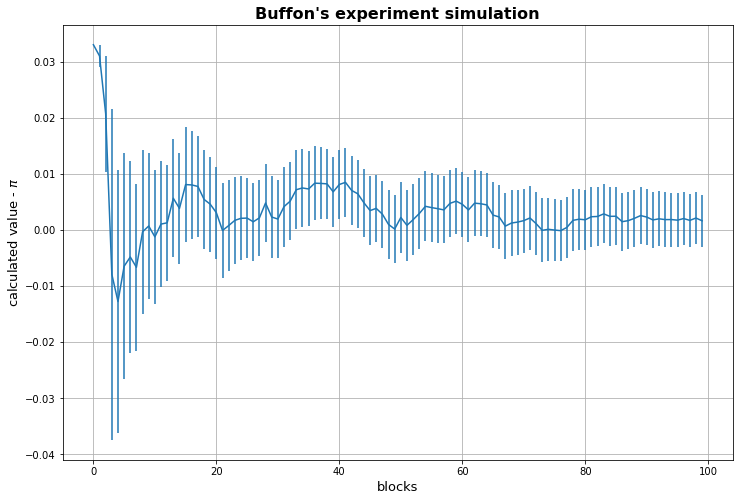

In [6]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math

y,err = np.loadtxt("data/buffon.dat",usecols=(0,1),unpack=True,delimiter=' ')
x = np.arange(y.size)

plt.figure(figsize=(12,8))
plt.errorbar(x,y-math.pi,err)
plt.grid(True)
plt.title("Buffon's experiment simulation",fontweight='bold',fontsize=16)
plt.xlabel("blocks",fontsize=13)
plt.ylabel(r'calculated value - $\pi$',fontsize=13)

plt.show()

Anche in questo caso, il risultato è compatibile con il valore noto di $\pi$.